In [2]:
## Importing necessary packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler, MinMaxScaler, StandardScaler


%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
sns.set_context(context = 'notebook', font_scale = 1.5)
sns.set_style(style = 'white')

## Importing dataset 
print(sns.get_dataset_names())  ## ['anagrams', 'anscombe', 'attention', 'brain_networks', 
## 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 
## 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [4]:
anagrams = sns.load_dataset('anagrams')
anagrams.head()

,subidr,attnr,num1,num2,num3
0,1,divided,2,4.0,7
1,2,divided,3,4.0,5
2,3,divided,3,5.0,6
3,4,divided,5,7.0,5
4,5,divided,4,5.0,8


In [5]:
## Checking the datatypes for each feature
# anagrams.dtypes

## Checking the number of non-null values
anagrams.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   subidr  20 non-null     int64  
 1   attnr   20 non-null     object 
 2   num1    20 non-null     int64  
 3   num2    20 non-null     float64
 4   num3    20 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 928.0+ bytes


In [6]:
## Getting some descriptive summary statistics
anagrams.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
subidr,20.0,NaN,NaN,NaN,10.5,5.91608,1.0,5.75,10.5,15.25,20.0
attnr,20,2,divided,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num1,20.0,NaN,NaN,NaN,5.35,1.843195,2.0,4.75,5.5,6.25,8.0
num2,20.0,NaN,NaN,NaN,5.975,1.67391,3.0,5.0,5.5,7.25,9.0
num3,20.0,NaN,NaN,NaN,6.55,1.099043,5.0,6.0,6.0,7.0,9.0


In [7]:
## Checking the shape of dataframe
# anagrams.shape ## (20, 5)

# anagrams

In [8]:
## Checking for null values

anagrams.isna().sum() ## No null values

subidr    0
attnr     0
num1      0
num2      0
num3      0
dtype: int64

C:\Users\kofia\AppData\Local\Temp\ipykernel_24504\3177525818.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(anagrams.num1, bins = bins)


<Axes: xlabel='num1', ylabel='Density'>

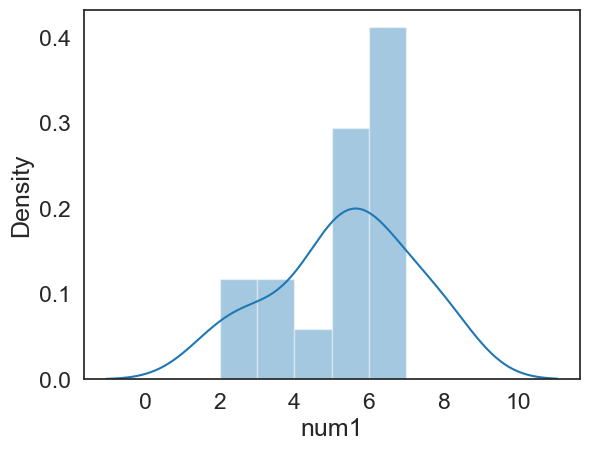

In [9]:
## Distribution Plots to see the distribution of univariate variables
bins = np.arange(2, 8, 1)
sns.distplot(anagrams.num1, bins = bins)

In [10]:
## Skewness and Kurtosis

print('Kurtosis is: \t', anagrams['num1'].kurt())
print('Skewness is: \t', anagrams['num1'].skew())

Kurtosis is: 	 -0.5353528077305589
Skewness is: 	 -0.3514648044924445


From the value of the kurtosis, the 'num1' variable has lighter tails as compared to the gaussian distribution; that is, it is less peaked and has thinner tails as as compared to the normal distribution.

Likewise for the skewness, it is slightly skewed to the left, meaning that the tail to the left side of the distribution is longer, and also that the median is greater than the mean because the smaller values 'pull' the mean to the left side.


C:\Users\kofia\AppData\Local\Temp\ipykernel_24504\2066877654.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(anagrams.num2)


<Axes: xlabel='num2', ylabel='Density'>

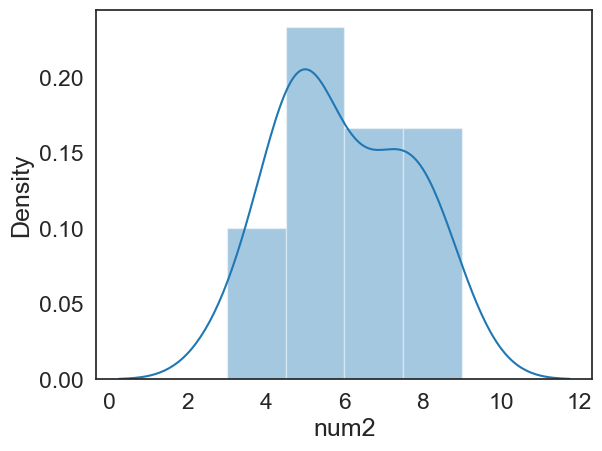

In [11]:
sns.distplot(anagrams.num2)


In [12]:
## Skewness and Kurtosis

print('Kurtosis is: \t', anagrams['num2'].kurt())
print('Skewness is: \t', anagrams['num2'].skew())

Kurtosis is: 	 -1.025211136282882
Skewness is: 	 0.16979509005240515


From the value of the kurtosis, the distribution for the 'num2' variable is statistically described as 'platykurtic', which means that the tails of the distribution are considered lighter with a less central peak.

Likewise, the skewness of the 'num2' variable is almost 0, so weakly positively skewed to the right, meaning that it is near to that of the normal distribution.


C:\Users\kofia\AppData\Local\Temp\ipykernel_24504\1307790669.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(anagrams.num3)


<Axes: xlabel='num3', ylabel='Density'>

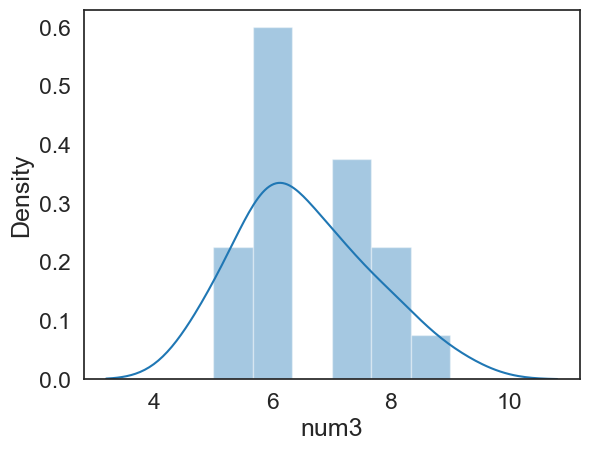

In [13]:
sns.distplot(anagrams.num3)


In [14]:
## Skewness and Kurtosis

print('Kurtosis is: \t', anagrams['num3'].kurt())
print('Skewness is: \t', anagrams['num3'].skew())

Kurtosis is: 	 -0.19490297151226788
Skewness is: 	 0.5200274247043473


From the value of the kurtosis, it is negative (platykurtic) and this means that it has lighter tails and less of a central peak. That is, a much broader peak.

The 'num3' variable is slightly skewed to the right, meaning that majority of the values in the distribution are located near the minimum range of the distribution and that the mean is greater than the median, meaning that the larger values are 'pulling' the mean to the right.


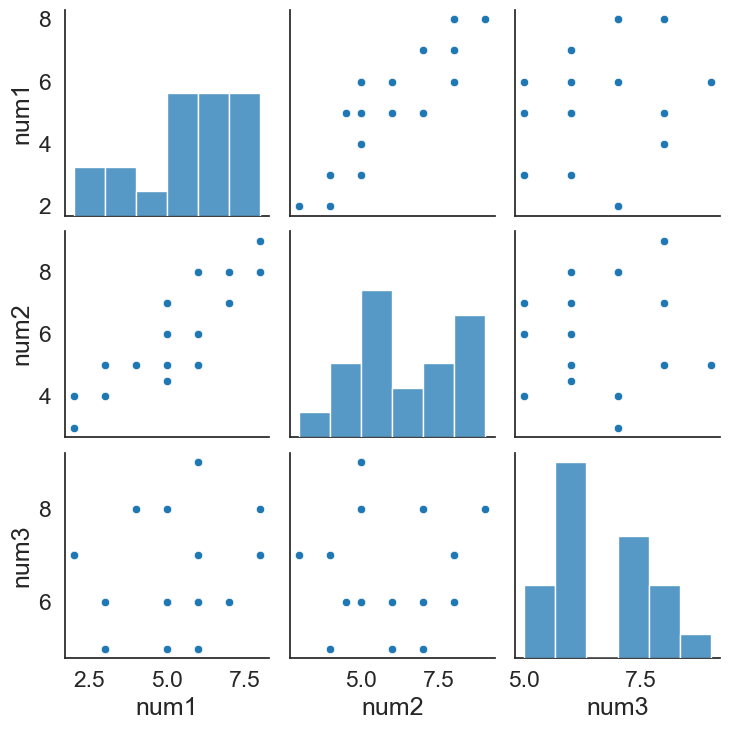

In [15]:
## Bivariate Analysis

sns.pairplot(data = anagrams, vars = ['num1', 'num2', 'num3'])

In [16]:
## Computing the Pearson's correlation for the features

anagrams_corr = anagrams.corr(numeric_only = True)
anagrams_corr

,subidr,num1,num2,num3
subidr,1.000000,0.697443,0.556717,0.020237
num1,0.697443,1.000000,0.821797,0.133804
num2,0.556717,0.821797,1.000000,0.150911
num3,0.020237,0.133804,0.150911,1.000000


<Axes: >

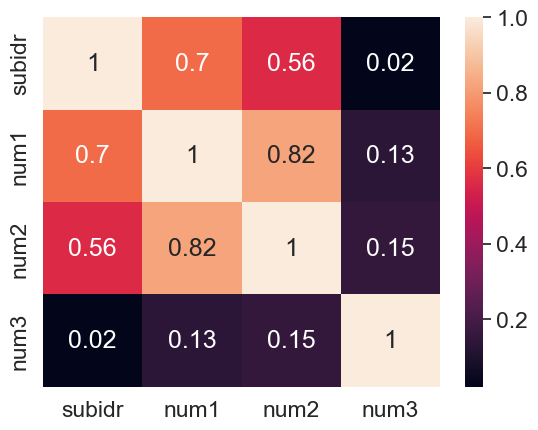

In [17]:
## Multivariate Analysis
sns.heatmap(anagrams_corr, annot = True)

It can be observed that there is a strong positive correlation between the 'num1' & 'num2' features, but almost no linear relationship (weak positive relationship) between the 'num1' & 'num3' features.

Likewise, we also observe that there is almost no linear relationship (weak positive relationship) between the 'num2' & 'num3' features.

In [18]:
## Feature Preprocessing
OneHotEnc = OneHotEncoder()
OneHotEnc

OneHotEncoder()

In [19]:
attnr = anagrams.attnr
attnr = attnr[:, np.newaxis]
OneHotEnc.fit(attnr)

C:\Users\kofia\AppData\Local\Temp\ipykernel_24504\684240441.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  attnr = attnr[:, np.newaxis]


OneHotEncoder()

In [20]:
## Feature labels
feature_labels = OneHotEnc.categories_
feature_labels = np.array(feature_labels).ravel()
print(feature_labels)

['divided' 'focused']


In [21]:
## Number of features fitted: 'attnr'
OneHotEnc.n_features_in_

1

In [22]:
feature_array = OneHotEnc.transform(attnr).toarray()
feature_array

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [23]:
feature_array_df = pd.DataFrame(data = feature_array, columns = feature_labels)
feature_array_df

,divided,focused
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


In [24]:
anagrams_new = pd.concat([anagrams, feature_array_df], axis = 1)
anagrams_new = anagrams_new.drop('attnr', axis=1)
anagrams_new

,subidr,num1,num2,num3,divided,focused
0,1,2,4.0,7,1.0,0.0
1,2,3,4.0,5,1.0,0.0
2,3,3,5.0,6,1.0,0.0
3,4,5,7.0,5,1.0,0.0
4,5,4,5.0,8,1.0,0.0
5,6,5,5.0,6,1.0,0.0
6,7,5,4.5,6,1.0,0.0
7,8,5,7.0,8,1.0,0.0
8,9,2,3.0,7,1.0,0.0
9,10,6,5.0,6,1.0,0.0


In [25]:
anagrams_new = anagrams_new.drop('subidr', axis = 1)

In [26]:
anagrams_new

,num1,num2,num3,divided,focused
0,2,4.0,7,1.0,0.0
1,3,4.0,5,1.0,0.0
2,3,5.0,6,1.0,0.0
3,5,7.0,5,1.0,0.0
4,4,5.0,8,1.0,0.0
5,5,5.0,6,1.0,0.0
6,5,4.5,6,1.0,0.0
7,5,7.0,8,1.0,0.0
8,2,3.0,7,1.0,0.0
9,6,5.0,6,1.0,0.0


In [28]:
minMax = MinMaxScaler()
minMax

MinMaxScaler()

In [30]:
X = anagrams_new.loc[:, ['num1', 'num2', 'num3']]
X

,num1,num2,num3
0,2,4.0,7
1,3,4.0,5
2,3,5.0,6
3,5,7.0,5
4,4,5.0,8
5,5,5.0,6
6,5,4.5,6
7,5,7.0,8
8,2,3.0,7
9,6,5.0,6


In [31]:
X_fit = minMax.fit(X)
X_fit

MinMaxScaler()

In [41]:
X_fit.data_max_
X_fit.data_min_
X_fit.data_range_

feat_names = np.array(X_fit.feature_names_in_).ravel()
print(feat_names)

['num1' 'num2' 'num3']


In [36]:
X_scaled = minMax.transform(X)
X_scaled

array([[0.        , 0.16666667, 0.5       ],
       [0.16666667, 0.16666667, 0.        ],
       [0.16666667, 0.33333333, 0.25      ],
       [0.5       , 0.66666667, 0.        ],
       [0.33333333, 0.33333333, 0.75      ],
       [0.5       , 0.33333333, 0.25      ],
       [0.5       , 0.25      , 0.25      ],
       [0.5       , 0.66666667, 0.75      ],
       [0.        , 0.        , 0.5       ],
       [0.66666667, 0.33333333, 0.25      ],
       [0.66666667, 0.33333333, 0.25      ],
       [1.        , 1.        , 0.75      ],
       [0.66666667, 0.33333333, 1.        ],
       [1.        , 0.83333333, 0.5       ],
       [1.        , 0.83333333, 0.5       ],
       [0.66666667, 0.83333333, 0.5       ],
       [0.83333333, 0.66666667, 0.25      ],
       [0.83333333, 0.83333333, 0.25      ],
       [0.5       , 0.5       , 0.25      ],
       [0.66666667, 0.5       , 0.        ]])

In [43]:
new_df = pd.DataFrame(X_scaled, columns = feat_names)
new_df.columns = ['Num1', 'Num2', 'Num3']
new_df

,Num1,Num2,Num3
0,0.000000,0.166667,0.50
1,0.166667,0.166667,0.00
2,0.166667,0.333333,0.25
3,0.500000,0.666667,0.00
4,0.333333,0.333333,0.75
5,0.500000,0.333333,0.25
6,0.500000,0.250000,0.25
7,0.500000,0.666667,0.75
8,0.000000,0.000000,0.50
9,0.666667,0.333333,0.25


In [46]:
Anagrams = pd.concat([anagrams_new, new_df], axis = 1)

In [48]:
Anagrams = Anagrams.drop(['num1', 'num2', 'num3'], axis = 'columns')
Anagrams

,divided,focused,Num1,Num2,Num3
0,1.0,0.0,0.000000,0.166667,0.50
1,1.0,0.0,0.166667,0.166667,0.00
2,1.0,0.0,0.166667,0.333333,0.25
3,1.0,0.0,0.500000,0.666667,0.00
4,1.0,0.0,0.333333,0.333333,0.75
5,1.0,0.0,0.500000,0.333333,0.25
6,1.0,0.0,0.500000,0.250000,0.25
7,1.0,0.0,0.500000,0.666667,0.75
8,1.0,0.0,0.000000,0.000000,0.50
9,1.0,0.0,0.666667,0.333333,0.25


In [49]:
Anagrams

,divided,focused,Num1,Num2,Num3
0,1.0,0.0,0.000000,0.166667,0.50
1,1.0,0.0,0.166667,0.166667,0.00
2,1.0,0.0,0.166667,0.333333,0.25
3,1.0,0.0,0.500000,0.666667,0.00
4,1.0,0.0,0.333333,0.333333,0.75
5,1.0,0.0,0.500000,0.333333,0.25
6,1.0,0.0,0.500000,0.250000,0.25
7,1.0,0.0,0.500000,0.666667,0.75
8,1.0,0.0,0.000000,0.000000,0.50
9,1.0,0.0,0.666667,0.333333,0.25
